# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/15/2022
* Student Name: Linnaea Kavulich
* Student Net ID: qpk4kp
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: 

# The Monte Carlo Module

In [3]:
import numpy as np
import pandas as pd

class Die():
    
    def __init__(self, faces):
        '''
        This is the initializer method
    
        PURPOSE: Given an array of faces, creates a die object 
        
        INPUTS
        faces    array of values to represent faces of a die
    
        OUTPUT
        self.df  dataframe of die faces and their relative weights
        '''
        faces = pd.array(faces)
        weights = []
        for i in range(len(faces)):
            weights.append(float(1))
                
        self.df = pd.DataFrame({'Weights': weights,
                               'Faces': faces})
        
    
    def change_weight(self, face, new_weight):
        '''
        This is a method that allows the faces of a die object to be weighted 
        differently
    
        PURPOSE: Will edit an existing die object given a face of an already 
        instantiated die object and the corresponding desired new weight. 
        
        INPUTS
        face    either a string, int or float of the face to be weighted
        new_weight an int or float of the desired magnitude      
    
        OUTPUT
        self.df  dataframe of die faces and their updated relative weights
        '''
        if type(face) == str:
            if ((self.df['Faces'].str.contains(str(face)).any()) == False):
                print('This die does not have a face ' + str(face))
            else:
                self.df.loc[self.df['Faces'] == face, 'Weights'] = new_weight
        
        elif (type(face) == int) or (type(face) == float):
            if (((face) in self.df['Faces'].values) == False):
                print('This die does not have a face ' + str(face))
            else:
                self.df.loc[self.df['Faces'] == face, 'Weights'] = new_weight
        
        elif(isinstance(float(new_weight), float) == False):
            print('Please enter a number!')
        
    
    def roll_die(self, num_rolls = 1):
        '''
        This is a method that allows a die object to be rolled in order to 
        generate a dataframe of values
    
        PURPOSE: Will roll an existing die instance to return the requested
        number of values
        
        INPUTS
        num_rolls int or float of the desired number of rolls      
    
        OUTPUT
        self.results  dataframe of die faces which appeared on each roll
        '''
        results = []
        for i in range(1,num_rolls+1):
            result = self.df.Faces.sample(weights=self.df.Weights).values[0]
            results.append(result)
        self.results = pd.Series(results)
        return self.results   
    
    
    def show(self):
        '''
        This is a method that shows the created die
        
        PURPOSE: Displays the die faces with their corresponding weights for
        each die instance
        
        INPUTS
        none     
    
        OUTPUT
        self.df  dataframe of die faces and respective weights
        '''
        return self.df
    
    
#___________________________________________________________________________________________________________________________

class Game():
  
    def __init__(self, die):
        '''
        This is the initializer method
    
        PURPOSE: Given a list of die objects, rolls the provided number of dice
        the requested number of times to return a dataframe with the results of
        each roll. 
        
        INPUTS
        die    a list of die objects; can contain 1 or more dice
    
        OUTPUT
        none
        '''
        self.die = die
        print(self.die)
        
    def play(self, n_rolls):
        '''
        This is a method that allows a collection of die objects to be rolled in 
        order to generate a dataframe of values
    
        PURPOSE: Will roll an the set of dice initialy passed and return the
        results for the required number of rolls. 
        
        INPUTS
        n_rolls int or float of the desired number of rolls      
    
        OUTPUT
        self.game_df  dataframe of die faces that appeared on each roll for each
        die provided. 
        '''
        self.N = [die.roll_die(n_rolls) for die in self.die]
        
        self.game_df = pd.DataFrame(self.N).T 
        self.game_df = self.game_df.rename_axis(index='Roll Number') 
        
    def show(self):
        '''
        This is a method that shows the results of a game
        
        PURPOSE: Displays the die faces which appeared on each of n rolls 
        
        INPUTS
        none     
    
        OUTPUT
        self.game_df  dataframe of die faces which appeared on each roll
        '''
        return self.game_df   

    
#__________________________________________________________________________________________________________
    
class Analyzer():
    
    def __init__(self, games):
        '''
        This is the initializer method
    
        PURPOSE: Given a defined instance of the game class, will analyze the 
        results of playing
        
        INPUTS
        games    a dataframe of results from a played instance of game. 
    
        OUTPUT
        none
        '''
        self.games = games
        

    def jackpot(self):
        '''
        This method counts the number of rolls in a game where all faces of your 
        dice display the same number (know as a 'jackpot').
        
        INPUTS
        none
        
        OUTPUTS
        num_jckpts a count of the number of jackpots (defined above) in the
        given game instance. 
        '''
        num_jckpts = len(self.games[self.games.apply(pd.Series.nunique, axis=1) == 1])
        print('You have', str(num_jckpts), 'jackpots')
        return num_jckpts
    
    def combo(self):
        '''
        This is a method that shows the unique combinations of faces that
        appeared in the duration of the game instance which was passed to 
        Analyzer. 
        
        PURPOSE: Displays the unique combinations of faces rolled
        
        INPUTS
        none     
    
        OUTPUT
        combos  dataframe of unique cominations of faces which occured in the 
        game
        '''
        combos = self.games.value_counts(ascending=True).reset_index(name='count')
        combos = combos.rename_axis(index='Index')
        print(combos)
                   
    def faces_per_roll(self):
        '''
        This is a method that shows the number of times each face of the a given
        die appeared in one roll.
        
        PURPOSE: Displays the number of instances of a given face on a die
        
        INPUTS
        none     
    
        OUTPUT
        faces_per_roll  dataframe of die faces and respective frequencies
        '''
        faces_per_roll = self.games.apply(pd.Series.value_counts, axis=1)
        return(faces_per_roll)

# Test Module

In [ ]:
import unittest
import pandas as pd

class DieTestSuite(unittest.TestCase):

    def test_1_change_weight(self):
        '''
        '''
        new = Die([1,2,3])
        new.change_weight(2,1000)
        self.assertTrue(max(new.df["Weights"]) == 1000)
        
        
    
    def test_2_roll_die(self):
        '''
        '''
        new = Die([1,2,3])
        new.roll_die(5)
        self.assertTrue(len(new.results == 5))
    
    def test_3_show(self):
        '''
        '''
        new = Die([1,2,3])
        new.roll_die(5)
        new.df

    
class GameTestSuite(unittest.TestCase):
    
    def test_4_play(self):
        '''
        '''
        x1 = Die([1,2,3])
        x2 = Die([1,2,3])
        x3 = Die([1,2,3])                
        newtst = Game([x1, x2, x3])
        newtst.play(5)
        newtst = newtst.show()
        newtst
        self.assertTrue(len(newtst) == 5)
    
    def test_5_show(self):
        '''
        '''
        x1 = Die([1,2,3])
        x2 = Die([1,2,3])
        x3 = Die([1,2,3])
        newtst = Game([x1, x2, x3])
        newtst.play(5)
        newtst = newtst.show()
        newtst
    

class AnalyzerTestSuite(unittest.TestCase):
    
    def test_6_jackpot(self):
        '''
        '''
        x2 = Die([1,1,1])
        x3 = Die([1,1,1])

        bar = Game([x2, x3])
        bar.play(5)
        bar = bar.show()
        test = Analyzer(bar)
        test.jackpot()
        self.assertTrue(len(test.games[test.games.apply(pd.Series.nunique, axis=1) == 1]) == 5)
    
    def test_7_combo(self):
        b1 = Die([1,1,1])
        b2 = Die([1,1,1])

        jckpt = Game([b1, b2])
        jckpt.play(5)
        jckpt = jckpt.show()
        
        test2 = Analyzer(jckpt)
        
        test_df = test2.games.value_counts(ascending=True).reset_index(name='count')
        type(test_df)
        test_df['count']
        print(test_df['count'])
        self.assertTrue(int(test_df['count']) == 5)
    
    def test_8_faces_per_roll(self):
        k1 = Die([1,1,1])
        k2 = Die([1,1,1])
        k3 = Die([1,1,1])

        only_ones = Game([k1, k2, k3])
        only_ones.play(5)
        only_ones = only_ones.show()
        
        test8 = Analyzer(only_ones)
        test8.faces_per_roll()

        df_of_ones = pd.DataFrame(test8.faces_per_roll())
        self.assertTrue((df_of_ones[1].values[0]) == 3)

if __name__ == '__main__':
    unittest.main(verbosity=2)

# Test Results

test_6_jackpot (__main__.AnalyzerTestSuite) ... ok
test_7_combo (__main__.AnalyzerTestSuite) ... ok
test_8_faces_per_roll (__main__.AnalyzerTestSuite) ... ok
test_1_change_weight (__main__.DieTestSuite) ... ok
test_2_roll_die (__main__.DieTestSuite) ... ok
test_3_show (__main__.DieTestSuite) ... ok
test_4_play (__main__.GameTestSuite) ... ok
test_5_show (__main__.GameTestSuite) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.105s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

[<__main__.Die object at 0x7f51895e9130>, <__main__.Die object at 0x7f51895e9130>, <__main__.Die object at 0x7f51895e9130>]
[<__main__.Die object at 0x7f516137e8b0>, <__main__.Die object at 0x7f516137e8b0>, <__main__.Die object at 0x7f51895e9130>]
You have 245 jackpots
You have 358 jackpots
You have 358 jackpots
You have 245 jackpots


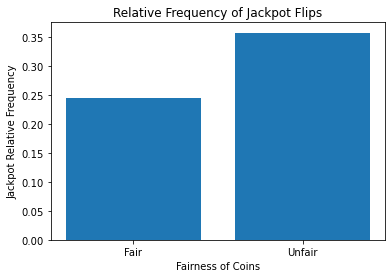

In [6]:
#Note: instructions not clear "Play a game of 1000 flips of three coins with all fair dice." -- we were not asked to define 
#any dice yet? I took this to mean "Play a game of 1000 flips of three fair coins"

#Subsequently, I took "Play a game of 1000 flips with two unfair dice and one fair die." to mean "Play a game of 1000 flips
#with two unfair *coins* and one fair *coin*"

# from montecarlo import Die
# from montecarlo import Game
# from montecarlo import Analyzer
import pandas as pd
import numpy as np

fair_coin = Die(['H', 'T'])
fair_coin.df

unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

unfair_coin.df

fair_game = Game([fair_coin, fair_coin, fair_coin])

fair_game.play(1000)
fair_game = fair_game.show()

unfair_game = Game([unfair_coin, unfair_coin, fair_coin])
unfair_game.play(1000)
unfair_game = unfair_game.show()
unfair_game

ana_fair_game = Analyzer(fair_game)
ana_fair_game.jackpot()

ana_unfair_game = Analyzer(unfair_game)
ana_unfair_game.jackpot()
unfair_jckpt = float(ana_unfair_game.jackpot())

unfair_rel_freq = unfair_jckpt/1000
unfair_rel_freq

fair_jckpt = float(ana_fair_game.jackpot())
fair_rel_freq = fair_jckpt/1000
fair_rel_freq

import matplotlib.pyplot as plt

games = ['Fair', 'Unfair']
rel_freq = [fair_rel_freq, unfair_rel_freq]

plt.bar(games,rel_freq)
plt.title('Relative Frequency of Jackpot Flips')
plt.xlabel('Fairness of Coins')
plt.ylabel('Jackpot Relative Frequency')
plt.show()

## Scenario 2

[<__main__.Die object at 0x7f515b9a63d0>, <__main__.Die object at 0x7f515b9a63d0>, <__main__.Die object at 0x7f515b9a63d0>, <__main__.Die object at 0x7f515b9a63d0>, <__main__.Die object at 0x7f515b9a63d0>]
[<__main__.Die object at 0x7f515ba3edc0>, <__main__.Die object at 0x7f515ba3edc0>, <__main__.Die object at 0x7f515ba3edf0>, <__main__.Die object at 0x7f515b9a63d0>, <__main__.Die object at 0x7f515b9a63d0>]
You have 2 jackpots
You have 0 jackpots
You have 2 jackpots
You have 0 jackpots


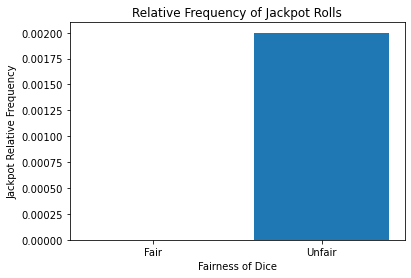

       0  1  2  3  4  count
Index                      
0      1  1  1  1  4      1
1      4  6  5  5  2      1
2      4  6  5  6  4      1
3      4  6  6  1  2      1
4      4  6  6  1  5      1
...   .. .. .. .. ..    ...
937    2  2  2  6  4      2
938    6  5  4  4  6      2
939    4  6  5  4  6      3
940    2  4  5  3  3      3
941    1  5  2  4  1      3

[942 rows x 6 columns]
       0  1  2  3  4  count
Index                      
0      1  1  1  1  1      1
1      6  1  1  3  5      1
2      6  1  1  3  6      1
3      6  1  1  4  2      1
4      6  1  1  5  2      1
...   .. .. .. .. ..    ...
754    6  6  1  4  3      6
755    6  6  1  5  3      6
756    6  6  1  2  2      6
757    6  6  1  2  6      7
758    6  6  1  5  2      8

[759 rows x 6 columns]


In [9]:
fair_die = Die([1,2,3,4,5,6])
unfair_die1 = Die([1,2,3,4,5,6])
unfair_die2 = Die([1,2,3,4,5,6])

unfair_die1.change_weight(6,5)
unfair_die2.change_weight(1,5)

fair_diegame = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_diegame.play(1000)
fair_diegame = fair_diegame.show()

unfair_diegame = Game([unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die])
unfair_diegame.play(1000)
unfair_diegame = unfair_diegame.show()

a_unfair = Analyzer(unfair_diegame)
a_unfair.jackpot()

a_fair = Analyzer(fair_diegame)
a_fair.jackpot()

unfairgame_jckpt = float(a_unfair.jackpot())
unfair_rf = unfairgame_jckpt/1000
unfair_rf

fairgame_jckpt = float(a_fair.jackpot())
fair_rf = fairgame_jckpt/1000
fair_rf

diegames = ['Fair', 'Unfair']
rf = [fair_rf, unfair_rf]

plt.bar(diegames, rf)
plt.title('Relative Frequency of Jackpot Rolls')
plt.xlabel('Fairness of Dice')
plt.ylabel('Jackpot Relative Frequency')
plt.show()

fair_combos = a_fair.combo()

unfair_combos = a_unfair.combo()

## Scenario 3

In [11]:
alpha = Die(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 
             'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y','z'])

alpha.change_weight('a', 8.4966)
alpha.change_weight('b', 2.0720)
alpha.change_weight('c', 4.5388)
alpha.change_weight('d', 3.3844)
alpha.change_weight('e', 11.1607)
alpha.change_weight('f', 1.8121)
alpha.change_weight('g', 2.4705)
alpha.change_weight('h', 3.0034)
alpha.change_weight('i', 7.5448)
alpha.change_weight('j', 0.1965)
alpha.change_weight('k', 1.1016)
alpha.change_weight('l', 5.4893)
alpha.change_weight('m', 3.0129)
alpha.change_weight('n', 6.6544)
alpha.change_weight('o', 7.1635)
alpha.change_weight('p', 3.1671)
alpha.change_weight('q', 0.1962)
alpha.change_weight('r', 7.5809)
alpha.change_weight('s', 5.7351)
alpha.change_weight('t', 6.9509)
alpha.change_weight('u', 3.3608)
alpha.change_weight('v', 1.0074)
alpha.change_weight('w', 1.2899)
alpha.change_weight('x', 0.2902)
alpha.change_weight('y', 1.7779)
alpha.change_weight('z', 0.2722)

print(alpha.df)

word_game = Game([alpha, alpha, alpha, alpha, alpha])

word_game.play(1000)

df_wg = word_game.show()

print(df_wg.sample(n=20))

#^ ran this an obscene number of times; my final estimate is *0.00012*

    Weights Faces
0    8.4966     a
1    2.0720     b
2    4.5388     c
3    3.3844     d
4   11.1607     e
5    1.8121     f
6    2.4705     g
7    3.0034     h
8    7.5448     i
9    0.1965     j
10   1.1016     k
11   5.4893     l
12   3.0129     m
13   6.6544     n
14   7.1635     o
15   3.1671     p
16   0.1962     q
17   7.5809     r
18   5.7351     s
19   6.9509     t
20   3.3608     u
21   1.0074     v
22   1.2899     w
23   0.2902     x
24   1.7779     y
25   0.2722     z
[<__main__.Die object at 0x7f515ba18d30>, <__main__.Die object at 0x7f515ba18d30>, <__main__.Die object at 0x7f515ba18d30>, <__main__.Die object at 0x7f515ba18d30>, <__main__.Die object at 0x7f515ba18d30>]
             0  1  2  3  4
Roll Number               
647          n  a  y  s  a
622          a  y  g  s  n
578          p  a  l  e  d
318          e  e  l  n  o
784          b  t  d  e  f
415          e  o  t  e  n
457          b  w  l  g  u
891          n  m  l  m  i
20           e  s  m  c  k
709        

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [12]:
!ls -lRF -o

.:
total 56
-rw-r--r-- 1 qpk4kp 49929 Jul 15 21:20 FinalProjectSubmissionTemplate.ipynb


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [1]:
pip install montecarlo

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for montecarlo: filename=montecarlo-0.1.17-py3-none-any.whl size=1881 sha256=6b0f35a81984aefeaa1a5775c452debf6c0e087f6c8e7bab24eb2dfdc5d38c83
  Stored in directory: /sfs/qumulo/qhome/qpk4kp/.cache/pip/wheels/f2/91/9b/c056d13a912aae6b6a213331ee4c025ef1f3fbccc2f2db0b56
Successfully built montecarlo
Note: you may need to restart the kernel to use updated packages.
